In [11]:
#'/Users/laurenneel/Documents/repo_energetics/energetics-model/output.csv'

import matplotlib.pyplot as plt
from time import time as what_time
from random import choice, gauss
import numpy as np
from numpy.random import *
from scipy.stats.mstats import *
from scipy.interpolate import interp1d
from numpy.random import uniform, seed, normal, binomial
from numpy import pi, min, max, percentile, radians, degrees
from numpy.fft import ifft2
import multiprocessing
from time import time
from scipy.interpolate import *
#from matplotlib.mlab import prctile as percent
from numpy import flipud
from math import exp, log, sin, cos, sqrt, acos, asin, atan, atan2
#from numpy import arctan as atan
#from numpy import arctan2 as atan2
#from numpy import arcsin as asin
#from numpy import arccos as acos
import pandas as pd ## added by LN
import math
import csv

full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output.csv')
#full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
df90 = full_df[full_df['J'] == 90]
df180 = full_df[full_df['J'] == 180]
df270 = full_df[full_df['J'] == 270]
df360 = full_df[full_df['J'] == 360]



display(full_df)

,time,J,x,y,te,tb,total_activity,mei,net,moved,smr,energy_balance
0,6.004170,1.0,117.851137,72.860613,-1.432832,15.984313,0.0,-1.933559,0.152617,0.0,0.152617,0.152617
1,6.020848,1.0,117.851137,72.860613,-1.450652,12.717672,0.0,-3.864118,0.114676,0.0,0.114676,0.267293
2,6.037526,1.0,117.851137,72.860613,-1.468472,10.059736,0.0,-5.679745,0.090880,0.0,0.090880,0.358174
3,6.054204,1.0,117.851137,72.860613,-1.486291,7.896455,0.0,-7.319206,0.075208,0.0,0.075208,0.433382
4,6.070883,1.0,117.851137,72.860613,-1.504111,6.135151,0.0,-8.760496,0.064467,0.0,0.064467,0.497849
...,...,...,...,...,...,...,...,...,...,...,...,...
306595,19.930507,365.0,117.851137,72.860613,18.433762,18.425205,68054.0,-0.706802,0.188955,0.0,0.188955,181822.665931
306596,19.947186,365.0,117.851137,72.860613,18.435788,18.427231,68054.0,-0.705861,0.188988,0.0,0.188988,181822.854919
306597,19.963864,365.0,117.851137,72.860613,18.437814,18.429257,68054.0,-0.704919,0.189022,0.0,0.189022,181823.043941
306598,19.980542,365.0,117.851137,72.860613,18.439840,18.431282,68054.0,-0.703977,0.189055,0.0,0.189055,181823.232996


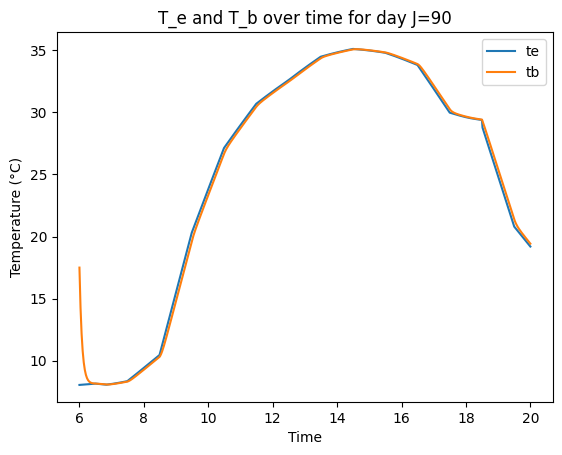

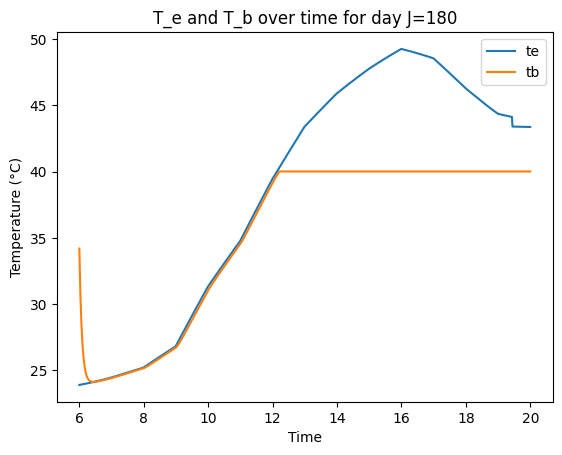

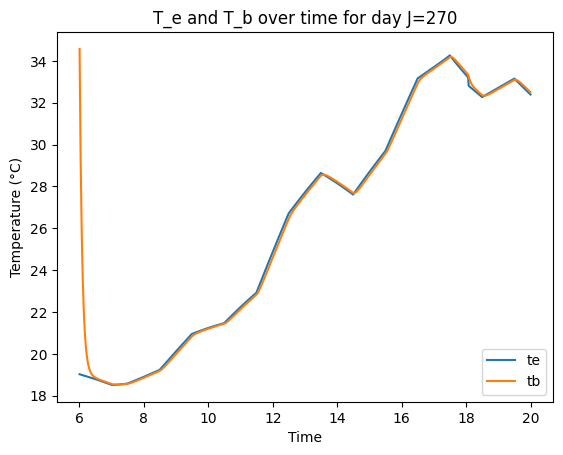

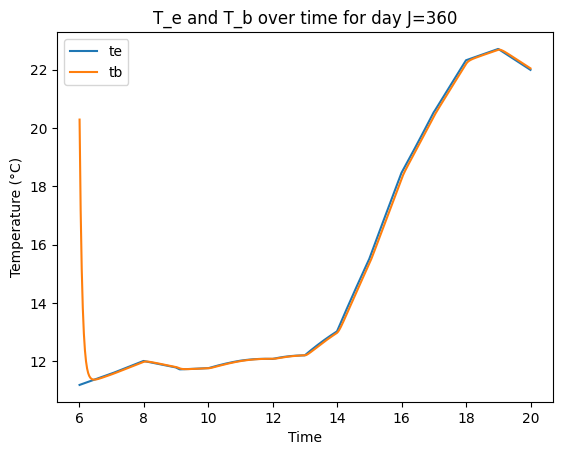

In [12]:



# create a line plot with time (minute) on the x-axis and te and tb on the y-axis
df90.plot(x='time', y=['te', 'tb'])
plt.title('T_e and T_b over time for day J=90')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

df180.plot(x='time', y=['te', 'tb'])
plt.title('T_e and T_b over time for day J=180')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

df270.plot(x='time', y=['te', 'tb'])
plt.title('T_e and T_b over time for day J=270')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

df360.plot(x='time', y=['te', 'tb'])
plt.title('T_e and T_b over time for day J=360')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# show the plot
plt.show()


In [9]:
## create a new column to get activity hours per day
# Create a new column 'activity_per_day' by dividing 'total_activity' by 'day_of_year'
full_df['activity_per_day'] = full_df['total_activity'] / (full_df['J']*840) #840 = # mins between 6:00-20:00 

# Print the updated DataFrame
print(full_df.tail())


             time      J           x          y         te         tb  \
306595  19.930507  365.0  110.015007  94.643358  18.433762  18.425205   
306596  19.947186  365.0  110.015007  94.643358  18.435788  18.427231   
306597  19.963864  365.0  110.015007  94.643358  18.437814  18.429257   
306598  19.980542  365.0  110.015007  94.643358  18.439840  18.431282   
306599  19.997220  365.0  110.015007  94.643358  18.441866  18.433308   

        total_activity       mei       net  moved       smr  energy_balance  \
306595         79769.0 -0.706802  0.188955    0.0  0.188955   193915.153677   
306596         79769.0 -0.705861  0.188988    0.0  0.188988   193915.342665   
306597         79769.0 -0.704919  0.189022    0.0  0.189022   193915.531687   
306598         79769.0 -0.703977  0.189055    0.0  0.189055   193915.720742   
306599         79769.0 -0.703035  0.189089    0.0  0.189089   193915.909831   

        activity_per_day  
306595          0.260173  
306596          0.260173  
30659

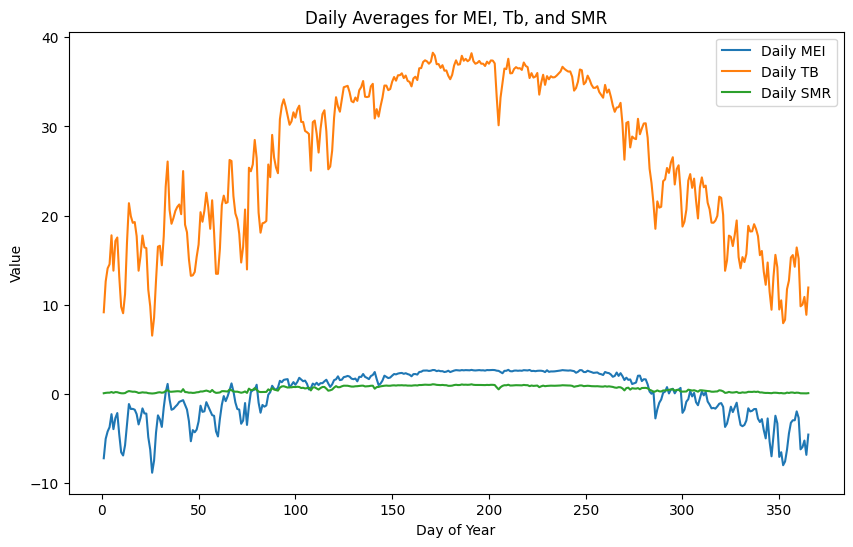

In [19]:
# filter the data for the variables of interest (mei, tb, smr, moved)
df_subset = full_df[['J', 'mei', 'tb', 'smr', 'moved', 'energy_balance']]

# calculate daily averages
daily_averages = df_subset.groupby('J').mean()

# plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(daily_averages.index, daily_averages['mei'], label='Daily MEI')
ax.plot(daily_averages.index, daily_averages['tb'], label='Daily TB')
ax.plot(daily_averages.index, daily_averages['smr'], label='Daily SMR')
#ax.plot(daily_averages.index, daily_averages['energy_balance'], label='Energy Balance')
#ax.plot(daily_averages.index, daily_averages['moved'], label='Average Moved')

ax.set_xlabel('Day of Year')
ax.set_ylabel('Value')
ax.set_title('Daily Averages for MEI, Tb, and SMR')
ax.legend()

plt.show()

In [25]:
full_df['energy_balance_time_adjusted'] = full_df['energy_balance'] / (full_df['J']*840) #840 = # mins between 6:00-20:00 

print(full_df['energy_balance_time_adjusted'])



0         0.000182
1         0.000318
2         0.000426
3         0.000516
4         0.000593
            ...   
306595    0.593029
306596    0.593030
306597    0.593030
306598    0.593031
306599    0.593031
Name: energy_balance_time_adjusted, Length: 306600, dtype: float64


KeyError: 'energy_balance_time_adjusted'

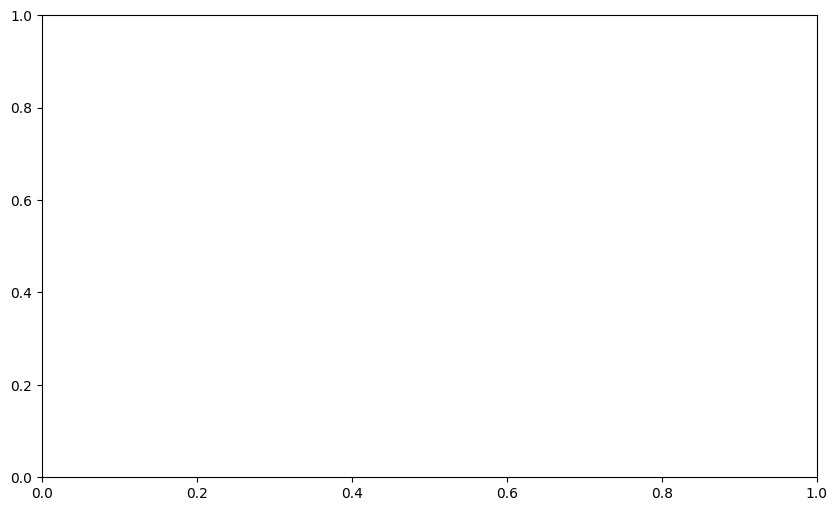

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))


#ax.plot(daily_averages.index, daily_averages['smr'], label='Daily SMR')
ax.plot(daily_averages.index, daily_averages['energy_balance_time_adjusted'], label='Energy Balance')


#ax.plot(daily_averages.index, daily_averages['energy_balance'], label='Energy Balance')
#ax.plot(daily_averages.index, daily_averages['moved'], label='Average Moved')

ax.set_xlabel('Day of Year')
ax.set_ylabel('Value')
#ax.set_title('Daily Averages for MEI, Tb, and SMR')
ax.legend()

plt.show()